In [1]:
import numpy as np

from matplotlib import pyplot as plt

from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error

In [2]:
file = r'E:\machine_learning\DATA\mines-vs-rocks\sonar.all-data.csv'
data = read_csv(file, header=None)

In [3]:
print(data.shape)

(208, 61)


In [4]:
set_option('display.max_rows',500)
print(data.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


In [5]:
set_option('display.width', 100)
print(data.head(20))

        0       1       2       3       4       5       6       7       8       9   ...      51  \
0   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  0.2111  ...  0.0027   
1   0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337  0.2872  ...  0.0084   
2   0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598  0.6194  ...  0.0232   
3   0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598  0.1264  ...  0.0121   
4   0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564  0.4459  ...  0.0031   
5   0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105  0.3039  ...  0.0045   
6   0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083  0.3513  ...  0.0201   
7   0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465  0.2838  ...  0.0081   
8   0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684  0.1487  ...  0.0145   
9   0.0164

In [6]:
set_option('precision', 3)
print(data.describe())

            0          1        2        3        4        5        6        7        8        9   \
count  208.000  2.080e+02  208.000  208.000  208.000  208.000  208.000  208.000  208.000  208.000   
mean     0.029  3.844e-02    0.044    0.054    0.075    0.105    0.122    0.135    0.178    0.208   
std      0.023  3.296e-02    0.038    0.047    0.056    0.059    0.062    0.085    0.118    0.134   
min      0.002  6.000e-04    0.002    0.006    0.007    0.010    0.003    0.005    0.007    0.011   
25%      0.013  1.645e-02    0.019    0.024    0.038    0.067    0.081    0.080    0.097    0.111   
50%      0.023  3.080e-02    0.034    0.044    0.062    0.092    0.107    0.112    0.152    0.182   
75%      0.036  4.795e-02    0.058    0.065    0.100    0.134    0.154    0.170    0.233    0.269   
max      0.137  2.339e-01    0.306    0.426    0.401    0.382    0.373    0.459    0.683    0.711   

       ...       50         51         52       53         54         55         56       

In [7]:
print(data.groupby(60).size())

60
M    111
R     97
dtype: int64


可以看出数据大致平衡

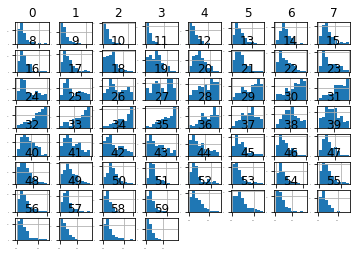

In [8]:
data.hist(xlabelsize=1, ylabelsize=1)
plt.show()

大部分数据呈高斯分布或指数分布

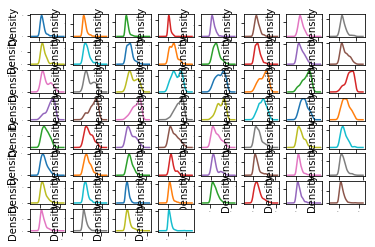

In [9]:
data.plot(kind='density', 
          subplots=True, 
          layout=(8, 8), 
          sharex=False, 
          fontsize=1,
          legend=False,
          )
plt.show()

## Box-Cox转换

可以将偏态分布变为正态分布

from scipy.special import boxcox1p

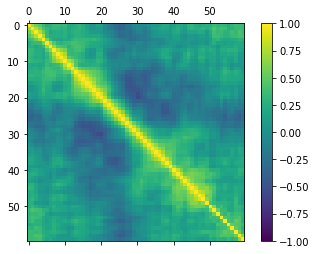

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

In [11]:
array = data.values
X = array[:, 0:60].astype(float)
Y = array[:, 60]
validation_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=validation_size,
                                                    random_state=seed
                                                    )

In [12]:
num_folds = 10
seed = 7
scoring = 'accuracy'

kfold = KFold(n_splits=num_folds,
              random_state=seed,
              )

In [13]:
models = {}
models['LR'] = LogisticRegression(solver='liblinear')
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC(gamma='auto')

In [14]:
results = []
for name in models:
    cv_result = cross_val_score(models[name],
                                X_train,
                                Y_train,
                                cv=kfold,
                                scoring=scoring,
                                )
    results.append(cv_result)
    msg = '%s: %f (%f)' % (name, cv_result.mean(), cv_result.std())
    print(msg)


LR: 0.782721 (0.093796)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.705147 (0.103397)
NB: 0.648897 (0.141868)
SVM: 0.608824 (0.118656)


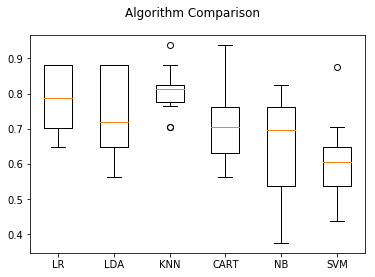

In [15]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [16]:
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(solver='liblinear'))])
pipelines['ScalerLASSO'] = Pipeline([('Scaler', StandardScaler()), ('LASSO', LinearDiscriminantAnalysis())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])
pipelines['ScalerEN'] = Pipeline([('Scaler', StandardScaler()), ('EN', GaussianNB())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])

In [17]:
results = []
for name in pipelines:
    cv_result = cross_val_score(pipelines[name],
                                X_train,
                                Y_train,
                                cv=kfold,
                                scoring=scoring,
                                )
    results.append(cv_result)
    msg = '%s: %f (%f)' % (name, cv_result.mean(), cv_result.std())
    print(msg)


ScalerLR: 0.734191 (0.095885)
ScalerLASSO: 0.746324 (0.117854)
ScalerKNN: 0.825735 (0.054511)
ScalerCART: 0.718015 (0.102481)
ScalerEN: 0.648897 (0.141868)
ScalerSVM: 0.836397 (0.088697)


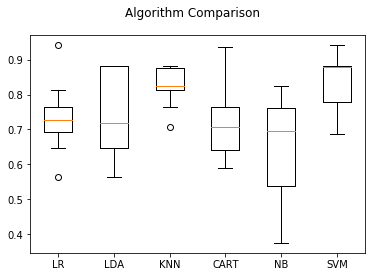

In [18]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [19]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring=scoring,
                    cv=kfold,
                    iid=False,
                    )
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params']
                 )
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))

最优：0.85 使用{'n_neighbors': 1}
0.850000 (0.059686) with {'n_neighbors': 1}
0.837132 (0.066014) with {'n_neighbors': 3}
0.837500 (0.037377) with {'n_neighbors': 5}
0.763971 (0.089374) with {'n_neighbors': 7}
0.751471 (0.087051) with {'n_neighbors': 9}
0.733456 (0.104831) with {'n_neighbors': 11}
0.733088 (0.105806) with {'n_neighbors': 13}
0.727941 (0.076148) with {'n_neighbors': 15}
0.709926 (0.079287) with {'n_neighbors': 17}
0.722059 (0.085088) with {'n_neighbors': 19}
0.710294 (0.109505) with {'n_neighbors': 21}


In [20]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train).astype(float)
param_grid = {}
param_grid['C'] = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 2.0]
param_grid['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
model = SVC(gamma='auto')
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring=scoring,
                    cv=kfold,
                    iid=False,
                    )
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params']
                 )
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))


ValueError: X should be a square kernel matrix

In [21]:
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostClassifier())])
ensembles['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])
ensembles['ScaledRF'] = Pipeline([('Scaler', StandardScaler()),
                                  ('RFR', RandomForestClassifier(n_estimators=100))])
ensembles['ScaledET'] = Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesClassifier(n_estimators=100))])

In [22]:
results = []
for name in ensembles:
    cv_result = cross_val_score(ensembles[name],
                                X_train,
                                Y_train,
                                cv=kfold,
                                scoring=scoring,
                                )
    results.append(cv_result)
    msg = '%s: %f (%f)' % (name, cv_result.mean(), cv_result.std())
    print(msg)


ScaledAB: 0.819853 (0.058293)
ScaledGBM: 0.847794 (0.106873)
ScaledRF: 0.801471 (0.075578)
ScaledET: 0.866176 (0.089983)


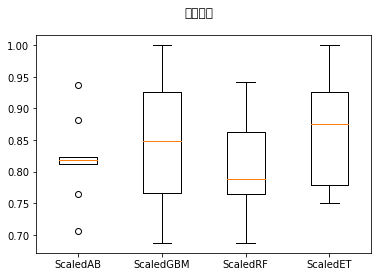

In [23]:
fig = plt.figure()
fig.suptitle('算法比较')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(ensembles.keys())
plt.show()

In [24]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}
model = GradientBoostingClassifier()
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring=scoring,
                    cv=kfold,
                    iid=False,
                    )
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))


最优：0.8716911764705882 使用{'n_estimators': 400}


In [25]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
model=SVC(C=1.5)
model.fit(X=rescaledX,y=Y_train)

rescaled_validationX=scaler.transform(X_test)
predictions=model.predict(rescaled_validationX)
print(accuracy_score(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

0.8571428571428571
[[23  4]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.92      0.85      0.88        27
           R       0.76      0.87      0.81        15

   micro avg       0.86      0.86      0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42

